# Tastes of New york
> ## IBM Data Science Professional Capstone Project

<a name="tableofcontents"></a>

## Table of Contents
1. [Introduction](#introduction)
2. [Data](#data)
3. [Analysis & Machine Learning](#analysis)
4. [Results](#results)
5. [Discussion](#discussion)
6. [Conclusion](#conclusion)

<a name="introduction"></a>

## 1. Introduction

New York City (NYC), also known as the City of New York or simply New York (NY), is the most populous city in the United States. With an estimated 2018 population of 8,398,748 distributed over a land area of about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States. With an estimated 19,979,477 people in its 2018 Metropolitan Statistical Area and 22,679,948 residents in its Combined Statistical Area. A global power city,New York City has been described as the cultural, financial,] and media capital of the world, and exerts a significant impact upon commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Home to the headquarters of the United Nations, New York is an important center for international diplomacy. This makes it definitely an intersting place to open a restaurant.Yet, depending on the sources there are alreay 20 to 36.000 restaurants in NYC. So it's crucial to get it right. 

Some of the most important decisions when opening a restaurant are about What (Which cuisine?) and Where?

To choose a Location and Lease a Commercial Space the following features are among the most important: Visibility and accessibility. Select a spot that can be seen by those driving or walking by. You should also look for an area that gets plenty of passersby on foot or in cars. In addition, consider if there is parking and ease of access by foot or car. The demographics. Ensure the target market of your restaurant matches the demographics of the area. And competition is actually great as this proves there is a place where a certain demographic like to go and eat a certain type of food.

On the other hand, on of the most compelling reasons not to chose a restaurant in a certain neighborhood is safety. Crime rates in New York City spiked in the 1980s and early 1990s as the crack epidemic hit,[1][2] but they have been dropping since 1991,[3] and, as of 2017, they are among the lowest of major cities in the United States. And though there is no objective reason to avoid NYC and its offers based on safety, there is a good rationale that people and potential clients might chose to ignore and avoid areas with higher crime areas than others.

Let's explore the diversity and business opportunities which come with opening a restaurant in a diverse city as NYC:

As quoted in an article - [What Food Tells Us About Culture](https://freelymagazine.com/2017/01/07/what-food-tells-us-about-culture/)  
*"Traditional cuisine is passed down from one generation to the next. It also operates as an expression of cultural identity. Immigrants bring the food of their countries with them wherever they go and cooking traditional food is a way of preserving their culture when they move to new places."*

<a name="data"></a>[Scroll Back to Table of Contents](#tableofcontents)

## 2. Data

To examine the above said, following data sources will be used:

1.  **New York City Dataset**
    *  Link: <https://geo.nyu.edu/catalog/nyu_2451_34572>
    *  Description: This New York City Neighborhood Names point file was created as a guide to New York City’s neighborhoods that appear on the web resource, “New York: A City of Neighborhoods.” Best estimates of label centroids were established at a 1:1,000 scale, but are ideally viewed at a 1:50,000 scale. This dataset will provide the addresses of neighborhood of NYC in json format. An extract of the json is as follows:
    ```
	{'type': 'Feature',
	'id': 'nyu_2451_34572.306',
	'geometry': {'type': 'Point',
	'coordinates': [-74.08173992211962, 40.61731079252983]},
	'geometry_name': 'geom',
	'properties': {'name': 'Fox Hills',
	'stacked': 2,
	'annoline1': 'Fox',
	'annoline2': 'Hills',
	'annoline3': None,
	'annoangle': 0.0,
	'borough': 'Staten Island',
	'bbox': [-74.08173992211962,
	40.61731079252983,
	-74.08173992211962,
	40.61731079252983]}}
    ```

2.  **Foursquare API:**
    *  Link: <https://developer.foursquare.com/docs>
    *  Description: Foursquare API, a location data provider, will be used to make RESTful API calls to retrieve data about venues in different neighborhoods. This is the link to [Foursquare Venue Category Hierarchy](https://developer.foursquare.com/docs/resources/categories). Venues retrieved from all the neighborhoods are categorized broadly into "Arts & Entertainment", "College & University", "Event", "Food", "Nightlife Spot", "Outdoors & Recreation", etc. An extract of an API call is as follows:
    ```
	'categories': [{'id': '4bf58dd8d48988d110941735',
	   'name': 'Italian Restaurant',
	   'pluralName': 'Italian Restaurants',
	   'shortName': 'Italian',
	   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
	   'suffix': '.png'},
	   'primary': True}],
	'verified': False,
	'stats': {'tipCount': 17},
	'url': 'http://eccorestaurantny.com',
	'price': {'tier': 4, 'message': 'Very Expensive', 'currency'
    
    
3.  **New York City Crime Database:**
    ```https://www1.nyc.gov/site/nypd/stats/crime-statistics/crime-statistics-landing.page
    *  Description: New Zork City provides and mantains a detailed database on all their police actiions, also relating to crime. This includes the locaion, purpose, GPS coordintaes and type or crime, misdeamenor, felony tried or commited. For the purppose of this analysis we will focus on the number of comitted felonies per neighborhood

<a name="methodology">[Scroll Back to Table of Contents](#tableofcontents)

## 2. Methodology

Download all the dependencies.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pprint import pprint # data pretty printer

import requests # library to handle requests
from bs4 import BeautifulSoup  # library to handle web scraping

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import folium # map rendering library

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
import matplotlib.colors as colors # Matplotlib and associated plotting modules
import matplotlib.cm as cm

from collections import Counter # count occurrences 

from sklearn.cluster import KMeans # import k-means from clustering stage
from sklearn.datasets.samples_generator import make_blobs

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


!pip install geocoder

import types

from botocore.client import Config
import ibm_boto3

!pip install wget
import wget
import os

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### Download and Explore New York City Dataset

In order to segment the neighborhoods of New York City, a dataset is required that contains the 5 boroughs and the neighborhoods, that exist in each borough, with respective latitude and longitude coordinates.

This dataset exists for free on the web. Here is the link 
* To the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572, and
* To its downloadable json format file: https://cocl.us/new_york_dataset/newyork_data.json

In [3]:
with open('D:/OneDrive/Downloads/newyork_data.json') as json_file:
    newyork_data = json.load(json_file)

In [4]:
print ("newyork_data key and value's length are: ") 
for key, value in newyork_data.items(): 
    print (key, len(str(value)))

newyork_data key and value's length are: 
type 17
totalFeatures 3
features 124743
crs 70
bbox 74


All the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [5]:
neighborhoods_data = newyork_data['features']
pprint(neighborhoods_data[305])

{'geometry': {'coordinates': [-74.08173992211962, 40.61731079252983],
              'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.306',
 'properties': {'annoangle': 0.0,
                'annoline1': 'Fox',
                'annoline2': 'Hills',
                'annoline3': None,
                'bbox': [-74.08173992211962,
                         40.61731079252983,
                         -74.08173992211962,
                         40.61731079252983],
                'borough': 'Staten Island',
                'name': 'Fox Hills',
                'stacked': 2},
 'type': 'Feature'}


#### Tranform the data into a *pandas* dataframe

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [7]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [10]:
address = 'New York City, NY'
location = None

# define an instance of the geocoder -> ny_explorer
while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork


In [12]:
map_newyork.save('map_newyork.html')

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

#### Define Foursquare Credentials and Version
Utilizing the Foursquare API to explore the neighborhoods and segment them.

In [13]:
CLIENT_ID = '0FVA3VYSD2FEXEHP0FWSMDZAP1VZ504KJPQI0CZ4E15KMXEW' # your Foursquare ID
CLIENT_SECRET = 'HLGOQV4QRNLGG5BBRFGJWH2RQ11ZOCRALBRTE1SPMQPKKVZR' # your Foursquare Secret
VERSION = '20180604'

**Fetch Foursquare Venue Category Hierarchy**

In [14]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

Let's see the structure or the keys of the returned request.

In [15]:
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [16]:
category_list = category_results['response']['categories']

In [17]:
len(category_list)

10

In [18]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


**_Food_ & It's Sub-Categories**

Let's create a function to return a dictionary with Ids' & Names of _Food_ & It's Sub-Categories.

In [19]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [20]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

Now, we have all the categories in _Food_ with their id's.

#### Explore the first neighborhood to understand the results of GET Request

Get the neighborhood's name.

In [21]:
neighborhoods.loc[0, 'Neighborhood']

'Wakefield'

Get the neighborhood's latitude and longitude values.

In [22]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


#### Now, let's get the _Food_ that is in Wakefield within a radius of 500 meters.

First, let's create the GET request URL to search for Venue with requested _Category ID_

In [23]:
LIMIT = 1 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=0FVA3VYSD2FEXEHP0FWSMDZAP1VZ504KJPQI0CZ4E15KMXEW&client_secret=HLGOQV4QRNLGG5BBRFGJWH2RQ11ZOCRALBRTE1SPMQPKKVZR&v=20180604&ll=40.89470517661,-73.84720052054902&radius=500&categoryId=4d4b7105d754a06374d81259&limit=1'

Send the GET request and examine the resutls

In [24]:
results = requests.get(url).json()

In [25]:
results['response']['venues']

[{'id': '4c783cef3badb1f7e4244b54',
  'name': 'Carvel Ice Cream',
  'location': {'address': '1006 E 233rd St',
   'lat': 40.890486685759605,
   'lng': -73.84856772568665,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.890486685759605,
     'lng': -73.84856772568665}],
   'distance': 483,
   'postalCode': '10466',
   'cc': 'US',
   'city': 'Bronx',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['1006 E 233rd St',
    'Bronx, NY 10466',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1c9941735',
    'name': 'Ice Cream Shop',
    'pluralName': 'Ice Cream Shops',
    'shortName': 'Ice Cream',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1578924606',
  'hasPerk': False}]

The category name of the venue **'Carvel Ice Cream'** is **'Food'**.

As, our aim is to segment the neighborhoods of NYC with respect to the _Food_ in its vicinity. We need to proceed further to fetch this data from all the 306 neighborhoods' venues.

#### Let's create a function to repeat the following process to all the neighborhoods in NYC:
* Loop through neighborhoods
    * Create the API request URL with radius=1000, LIMIT=50
    * Make the GET request
    * For each neighborhood, return only relevant information for each nearby venue
    * Append all nearby venues to a list
* Unfold the list & append it to dataframe being returned

The _categoryId_ parameter in the API request URL can be a comma seperated string. So, lets create a comma seperated string from _category_\__dict_.

In [26]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

The above process turns out to be redundant because if a top-level category is specified in the GET Request, all sub-categories will also match the query. But it is an interesting way to retrieve all the sub-categories ID with name.

In [27]:
def getNearbyFood(names, latitudes, longitudes, radius=2000, LIMIT=50):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    nearby_venues=pd.DataFrame ()
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
              CLIENT_ID, 
              CLIENT_SECRET, 
              VERSION, 
              lat, 
              lng, 
              radius,
              "4d4b7105d754a06374d81259", # "Food" category id
              LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        print("\nDone*** with {} venues with incompelete information.".format(not_found))
        return(nearby_venues)

**Let's use pickle library to serialize the information retrieved from GET requests. This step will counter any redundant requests to the Foursquare API.**

In [28]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        nyc_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    nyc_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('nyc_food_venues.pkl', 'wb') as f:
        pickle.dump(nyc_venues, f)
    print("---Dataframe Created and Serialized---")

---Dataframe Existed and Deserialized---


<a name="analysis"> [Scroll Back to Table of Contents](#tableofcontents)

## 3. Analysis & Machine Learning

#### Let's check the size of the resulting dataframe

In [29]:
print(nyc_venues.shape)
nyc_venues.head()

(15139, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
1,Wakefield,40.894705,-73.847201,Burger King,40.876911,-73.845978,Fast Food Restaurant
2,Wakefield,40.894705,-73.847201,Domino's Pizza,40.876564,-73.846898,Pizza Place
3,Wakefield,40.894705,-73.847201,Dunkin',40.894054,-73.824016,Donut Shop
4,Wakefield,40.894705,-73.847201,Fairway Market,40.891762,-73.820376,Grocery Store


#### Let's find out how many unique categories can be curated from all the returned venues

In [30]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))
nyc_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 176 uniques categories.


Venue Category
Coffee Shop                                 1250
Fast Food Restaurant                        1092
Donut Shop                                  1064
Pizza Place                                  920
Deli / Bodega                                802
Italian Restaurant                           726
Bakery                                       620
American Restaurant                          548
Bagel Shop                                   441
Diner                                        415
Chinese Restaurant                           408
Café                                         378
Mexican Restaurant                           303
Fried Chicken Joint                          284
Sandwich Place                               265
Burger Joint                                 246
Restaurant                                   245
Caribbean Restaurant                         236
Food Court                                   215
Seafood Restaurant                           182
Bar  

As we are interested in exploring the diversity of the neighborhood. Let's remove the generalized categories, like Coffee Shop, Cafe, etc.

In [31]:
# list all the categories
unique_categories = nyc_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Ice Cream Shop, Fast Food Restaurant, Pizza Place, Donut Shop, Grocery Store, Breakfast Spot, Diner, Bagel Shop, Burger Joint, Bakery, Deli / Bodega, Café, Juice Bar, Comfort Food Restaurant, Caribbean Restaurant, Bar, Other Nightlife, Asian Restaurant, Fried Chicken Joint, Pub, Italian Restaurant, Mexican Restaurant, Coffee Shop, American Restaurant, Dumpling Restaurant, Spanish Restaurant, BBQ Joint, Steakhouse, Seafood Restaurant, Buffet, Japanese Restaurant, Chinese Restaurant, Sushi Restaurant, Sandwich Place, Vegetarian / Vegan Restaurant, Frozen Yogurt Shop, Wings Joint, Food & Drink Shop, Cuban Restaurant, Convenience Store, Restaurant, Vietnamese Restaurant, Irish Pub, Food Truck, Casino, Food Court, Food, Greek Restaurant, New American Restaurant, Dessert Shop, Latin American Restaurant, French Restaurant, Tapas Restaurant, Eastern European Restaurant, Sports Bar, Theme Restaurant, Ramen Restaurant, Southern / Soul Food Restaurant, Peruvian Restaurant, African Restaurant, Tac

In [32]:
# manually create a list of generalized categories
general_categories = ['Dessert Shop','Food','Ice Cream Shop','Donut Shop','Bakery','Sandwich Place','Comfort Food Restaurant',
                    'Food Truck','Bagel Shop','Burger Joint','Restaurant','Frozen Yogurt Shop','Coffee Shop',
                    'Diner','Wings Joint','Café','Juice Bar','Breakfast Spot','Grocery Store','Bar','Cupcake Shop',
                    'Pub','Fish & Chips Shop','Cafeteria','Other Nightlife','Arcade','Hot Dog Joint','Food Court',
                    'Health Food Store','Convenience Store','Food & Drink Shop','Cocktail Bar','Cheese Shop',
                    'Snack Place','Sports Bar','Lounge','Theme Restaurant','Buffet','Bubble Tea Shop','Building',
                    'College Cafeteria','Tea Room','Supermarket','Hotpot Restaurant','Gastropub','Beer Garden',
                    'Fish Market','Beer Bar','Clothing Store','Music Venue','Bistro','Salad Place','Wine Bar','Gourmet Shop',
                    'Indie Movie Theater','Art Gallery','Gift Shop','Pie Shop','Fruit & Vegetable Store',
                    'Street Food Gathering','Dive Bar','Factory','Farmers Market'
                    'Candy Store','Event Space','Skating Rink','Miscellaneous Shop','Gas Station','Organic Grocery',
                    'Pastry Shop','Club House','Flea Market','Hotel','Furniture / Home Store','Bookstore','Pet Café',
                    'Gym / Fitness Center','Flower Shop','Financial or Legal Service','Hotel Bar','Hookah Bar','Poke Place',
                    'Market','Gluten-free Restaurant','Smoothie Shop','Butcher','Food Stand','Beach Bar','Beach',
                    'Soup Place','Rock Club','Residential Building (Apartment / Condo)','Laundry Service',
                    'Government Building','Bowling Alley','Nightclub','Park','Moving Target']

In [33]:
# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Food Service, BBQ Joint, Caribbean Restaurant, Falafel Restaurant, Korean Restaurant, Ukrainian Restaurant, Church, Warehouse Store, Australian Restaurant, Dutch Restaurant, Lebanese Restaurant, Mediterranean Restaurant, Cajun / Creole Restaurant, Vietnamese Restaurant, Peruvian Restaurant, Ramen Restaurant, Fried Chicken Joint, Tapas Restaurant, Szechuan Restaurant, Sushi Restaurant, Steakhouse, Casino, Spanish Restaurant, Latin American Restaurant, Cantonese Restaurant, Speakeasy, Cha Chaan Teng, English Restaurant, Colombian Restaurant, Gaming Cafe, Middle Eastern Restaurant, Thai Restaurant, South American Restaurant, Irish Pub, Chinese Restaurant, Shabu-Shabu Restaurant, Taiwanese Restaurant, Souvlaki Shop, Ethiopian Restaurant, Turkish Restaurant, Mexican Restaurant, Brazilian Restaurant, Shanghai Restaurant, Polish Restaurant, Taco Place, Malay Restaurant, Filipino Restaurant, Dosa Place, Airport Food Court, Empanada Restaurant, Austrian Restaurant, Burmese Restaurant, Cuban Res

Let's remove all the generalized categories, like Coffee Shop, Cafe, etc.

In [34]:
nyc_venues = nyc_venues[nyc_venues['Venue Category'].isin(food_categories)].reset_index()
nyc_venues.head(5)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Wakefield,40.894705,-73.847201,Burger King,40.876911,-73.845978,Fast Food Restaurant
1,2,Wakefield,40.894705,-73.847201,Domino's Pizza,40.876564,-73.846898,Pizza Place
2,6,Wakefield,40.894705,-73.847201,McDonald's,40.902645,-73.849485,Fast Food Restaurant
3,9,Wakefield,40.894705,-73.847201,Wendy's,40.889597,-73.819943,Fast Food Restaurant
4,12,Wakefield,40.894705,-73.847201,McDonald's,40.885636,-73.826840,Fast Food Restaurant


In [35]:
print('There are {} unique FOOD categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 99 unique FOOD categories.


#### Let's find out how many unique venues can be curated from all the returned venues

In [36]:
print('There are {} uniques venues.'.format(len(nyc_venues['Venue'].unique())))

There are 1810 uniques venues.


### Analyze Each Neighborhood

In [37]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head()

,African Restaurant,Airport Food Court,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Casino,Cha Chaan Teng,Chinese Restaurant,Church,Churrascaria,Colombian Restaurant,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Pakistani Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Pool,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 
nyc_onehot.head()

,African Restaurant,Airport Food Court,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Casino,Cha Chaan Teng,Chinese Restaurant,Church,Churrascaria,Colombian Restaurant,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Pakistani Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Pool,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield


In [39]:
# move neighborhood column to the first column
Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()

,Neighborhood,African Restaurant,Airport Food Court,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Casino,Cha Chaan Teng,Chinese Restaurant,Church,Churrascaria,Colombian Restaurant,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Pakistani Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Pool,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [40]:
nyc_onehot.shape

(7918, 100)

Let's count venues of each category in each neighborhood

In [41]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,African Restaurant,Airport Food Court,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Casino,Cha Chaan Teng,Chinese Restaurant,Church,Churrascaria,Colombian Restaurant,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Pakistani Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Pool,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Annadale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arden Heights,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arlington,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arrochar,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,11,1,0,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
venue_sum = venue_counts.sum(axis=1)
venue_sum.head ()

Neighborhood
Allerton         28
Annadale         24
Arden Heights    22
Arlington        30
Arrochar         35
dtype: int64

In [43]:
venue_index=venue_counts.div(venue_sum, axis=0)
venue_index.head ()

,African Restaurant,Airport Food Court,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Casino,Cha Chaan Teng,Chinese Restaurant,Church,Churrascaria,Colombian Restaurant,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Pakistani Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Pool,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.392857,0.000000,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.107143,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.071429,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.178571,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Annadale,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.208333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.041667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arden Heights,0.0,0.0,0.000000,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.136364,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.045455,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.227273,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.227273,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arlington,0.0,0.0,0.066667,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.133333,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.000000,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,0.033333,0.100000,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0

Let's find out the top 10 food categories in NYC

In [44]:
venue_counts_described = venue_counts.describe().transpose()

In [45]:
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Caribbean Restaurant,302.0,0.781457,2.039132,0.0,0.0,0.0,0.0,14.0
Fast Food Restaurant,302.0,3.615894,2.798578,0.0,1.0,3.0,5.0,12.0
Deli / Bodega,302.0,2.655629,2.509904,0.0,1.0,2.0,4.0,12.0
Korean Restaurant,302.0,0.403974,1.239863,0.0,0.0,0.0,0.0,12.0
Seafood Restaurant,302.0,0.602649,0.947663,0.0,0.0,0.0,1.0,11.0
Italian Restaurant,302.0,2.403974,2.437740,0.0,1.0,2.0,3.0,11.0
Pizza Place,302.0,3.046358,1.825758,0.0,2.0,3.0,4.0,9.0
American Restaurant,302.0,1.814570,1.550497,0.0,1.0,2.0,3.0,8.0
Chinese Restaurant,302.0,1.350993,1.445344,0.0,0.0,1.0,2.0,6.0
Thai Restaurant,302.0,0.311258,0.774901,0.0,0.0,0.0,0.0,5.0


In [46]:
venue_top10_list = venue_top10.index.values.tolist()

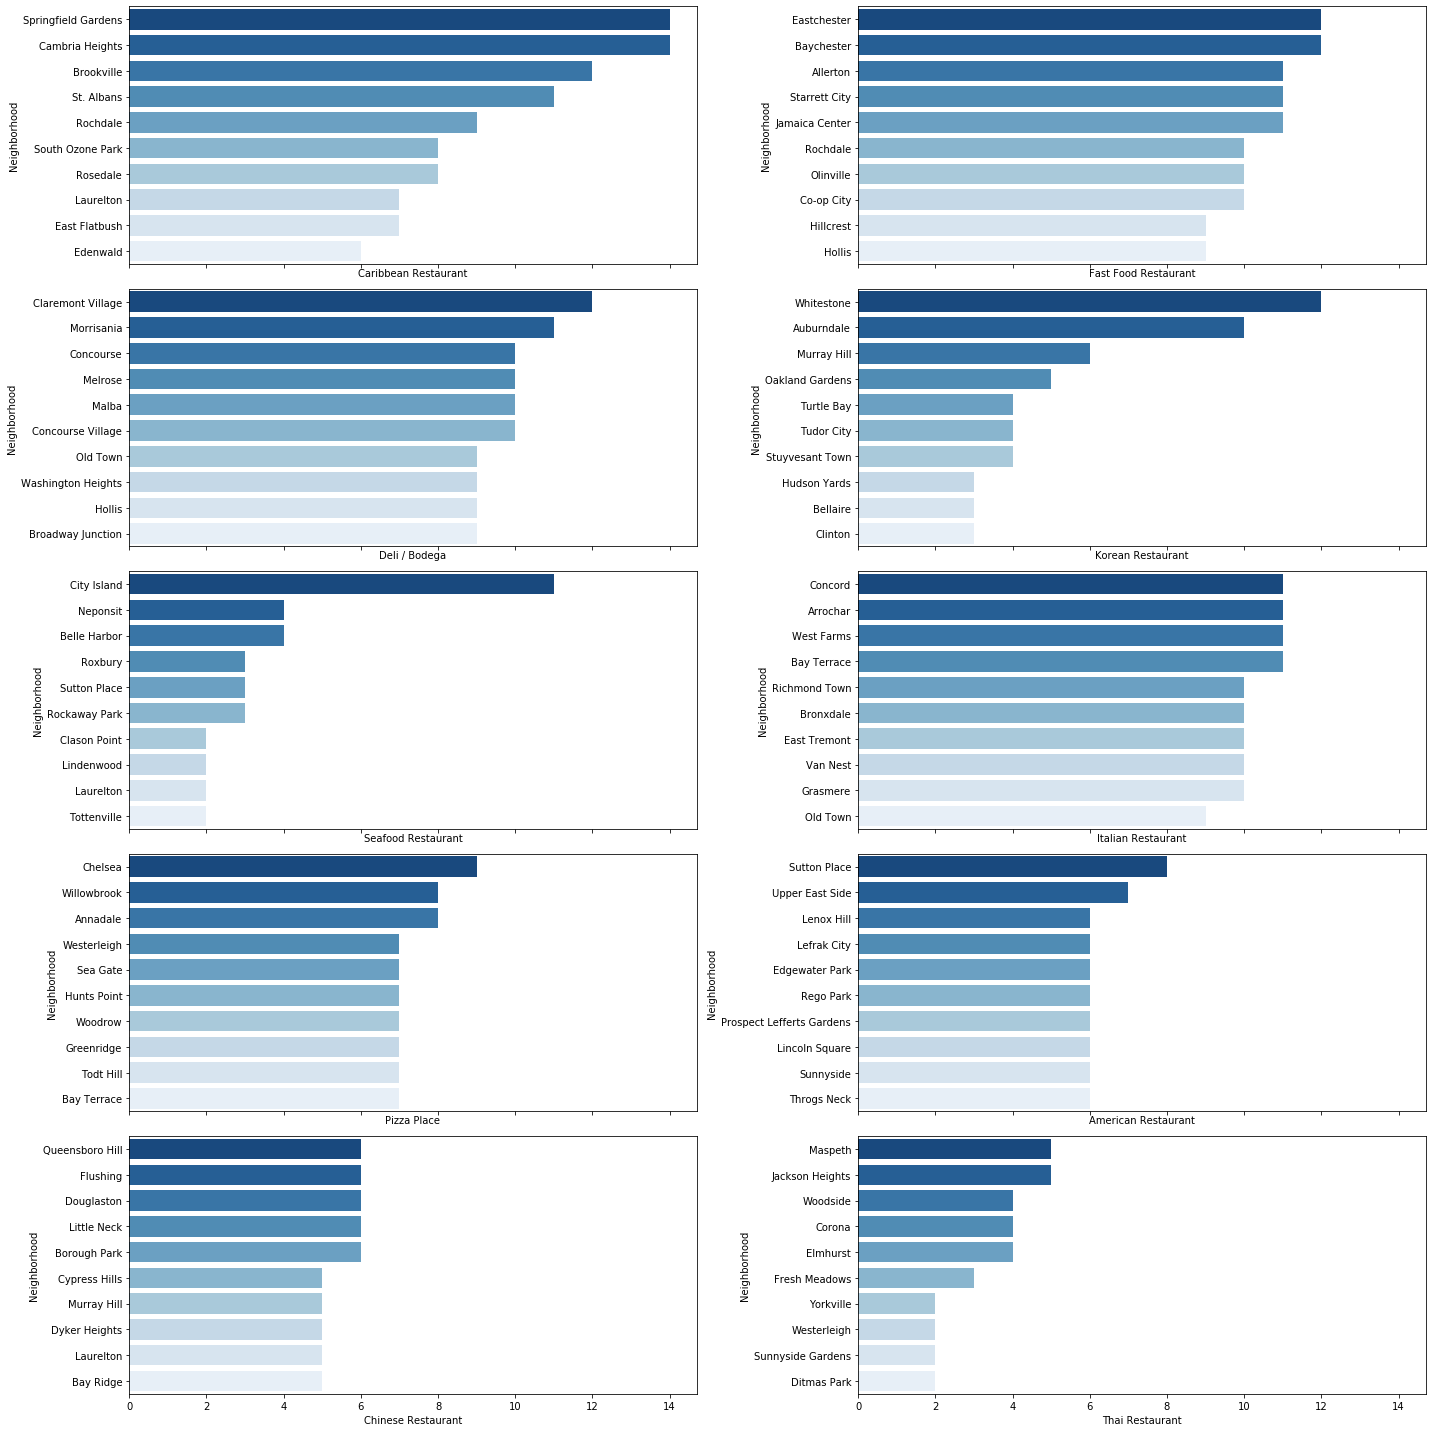

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

In [48]:
venue_counts_described_index = venue_index.describe().transpose()

In [49]:
venue_top10_index = venue_counts_described_index.sort_values('max', ascending=False)[0:10]
venue_top10_index

,count,mean,std,min,25%,50%,75%,max
American Restaurant,302.0,0.076548,0.077842,0.0,0.029635,0.060606,0.106673,0.666667
Seafood Restaurant,302.0,0.023856,0.038101,0.0,0.000000,0.000000,0.041250,0.407407
Korean Restaurant,302.0,0.016240,0.046905,0.0,0.000000,0.000000,0.000000,0.400000
Fast Food Restaurant,302.0,0.131768,0.093467,0.0,0.053363,0.115385,0.192308,0.400000
Caribbean Restaurant,302.0,0.025745,0.061982,0.0,0.000000,0.000000,0.000000,0.388889
Deli / Bodega,302.0,0.093769,0.084900,0.0,0.031250,0.076923,0.147059,0.387097
Italian Restaurant,302.0,0.090647,0.081629,0.0,0.033333,0.074074,0.136364,0.370370
Pizza Place,302.0,0.115855,0.066869,0.0,0.067241,0.111111,0.156250,0.333333
Chinese Restaurant,302.0,0.051076,0.054327,0.0,0.000000,0.038462,0.080000,0.272727
Sushi Restaurant,302.0,0.016402,0.032852,0.0,0.000000,0.000000,0.030303,0.227273


In [50]:
venue_top10_list_index = venue_top10.index.values.tolist()

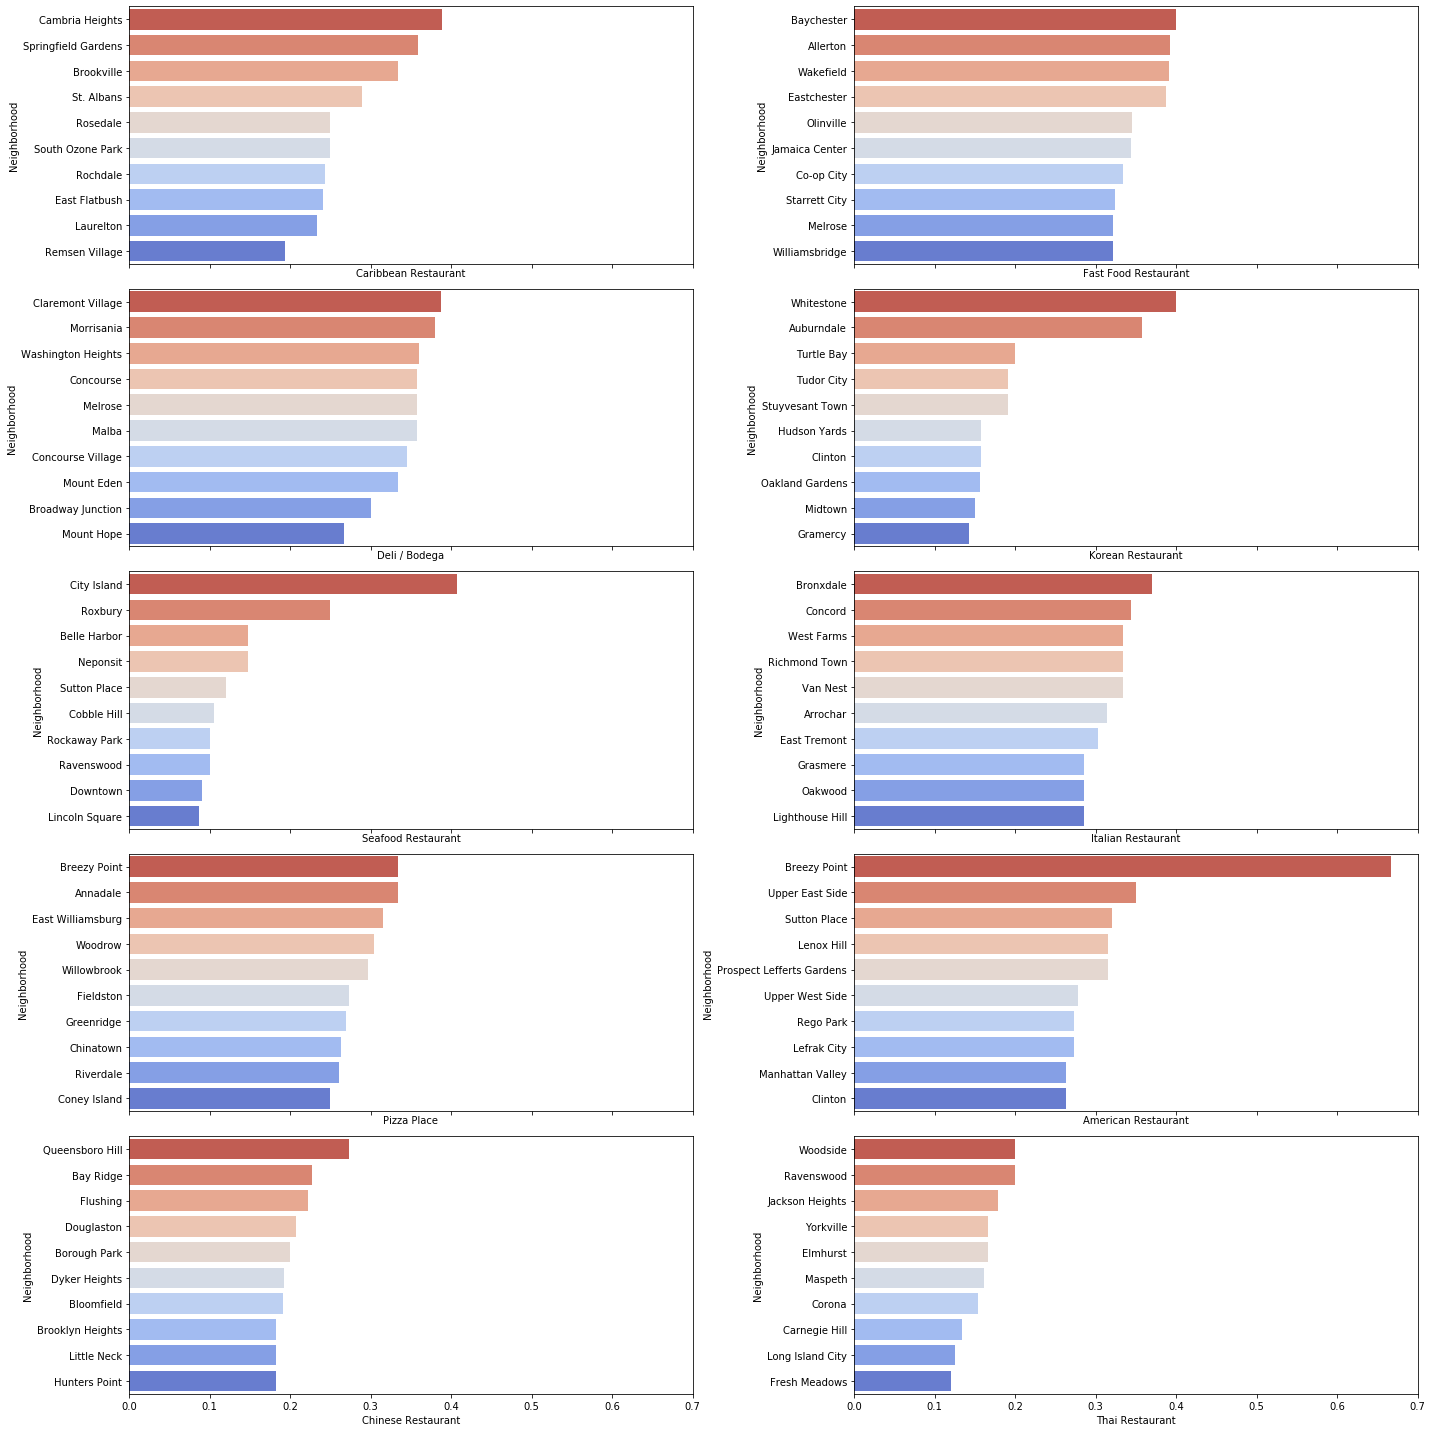

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_index[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("coolwarm", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [52]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

,Neighborhood,African Restaurant,Airport Food Court,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Casino,Cha Chaan Teng,Chinese Restaurant,Church,Churrascaria,Colombian Restaurant,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,Gaming Cafe,German Restaurant,Greek Restaurant,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Pakistani Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Pool,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Speakeasy,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store
0,Allerton,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.392857,0.000000,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.107143,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.071429,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.178571,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.208333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.041667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.000000,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.136364,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.045455,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.227273,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.227273,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.066667,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.133333,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.000000,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,0.033333,0.100000,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arrochar,0.0,0.0,0.028571,0.0,0.000000,0.0,0

#### Let's confirm the new size

In [53]:
nyc_grouped.shape

(302, 100)

#### Let's write a function to sort the venues in descending order.

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [55]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

In [56]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

In [57]:
for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allerton,Fast Food Restaurant,Pizza Place,Italian Restaurant,Spanish Restaurant,Mexican Restaurant
1,Annadale,Pizza Place,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant
2,Arden Heights,Sushi Restaurant,Pizza Place,Italian Restaurant,Fast Food Restaurant,Deli / Bodega
3,Arlington,Fast Food Restaurant,Deli / Bodega,Italian Restaurant,Pizza Place,American Restaurant
4,Arrochar,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Pizza Place,Fast Food Restaurant


### Cluster Neighborhoods

Run *k*-means to count Neighborhoods for each cluster label for variable cluster size

In [58]:
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

#### Determine the optimal number of clusters for k-means clustering

**The Elbow Method** - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

In [59]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(nyc_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

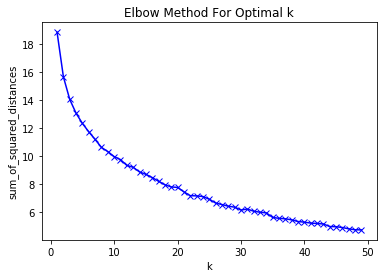

In [60]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

Elbow method does not seem to help us to determine the optimal number of clusters. Let's use another method.

**The Silhouette Method** - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). Source: Wikipedia

In [61]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(nyc_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(nyc_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

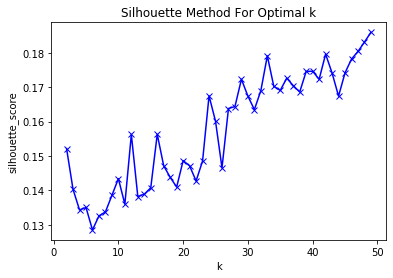

In [62]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

There is a peak at k = 2, k=8 k = 10. Two clusters will give a very broad classification of the venues.
#### Let's set number of clusters = 10

In [63]:
# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(nyc_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({1: 65, 7: 46, 0: 42, 4: 32, 8: 32, 5: 24, 9: 22, 6: 15, 3: 12, 2: 12})


Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [64]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [65]:
neighborhoods_venues_sorted.head(10)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Allerton,Fast Food Restaurant,Pizza Place,Italian Restaurant,Spanish Restaurant,Mexican Restaurant
1,1,Annadale,Pizza Place,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant
2,1,Arden Heights,Sushi Restaurant,Pizza Place,Italian Restaurant,Fast Food Restaurant,Deli / Bodega
3,7,Arlington,Fast Food Restaurant,Deli / Bodega,Italian Restaurant,Pizza Place,American Restaurant
4,1,Arrochar,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Pizza Place,Fast Food Restaurant
5,7,Arverne,Pizza Place,Deli / Bodega,Chinese Restaurant,Seafood Restaurant,Taco Place
6,5,Astoria,Seafood Restaurant,Thai Restaurant,Pizza Place,Deli / Bodega,Empanada Restaurant
7,1,Astoria Heights,Italian Restaurant,Fast Food Restaurant,Airport Food Court,Irish Pub,Deli / Bodega
8,3,Auburndale,Korean Restaurant,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Shanghai Restaurant
9,4,Bath Beach,Fast Food Restaurant,Chinese Restaurant,Dim Sum Restaurant,Italian Restaurant,Deli / Bodega


In [144]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
nyc_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
nyc_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
0,3,Allerton,Fast Food Restaurant,Pizza Place,Italian Restaurant,Spanish Restaurant,Mexican Restaurant,Bronx,40.865788,-73.859319
1,9,Annadale,Pizza Place,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant,Staten Island,40.538114,-74.178549
2,9,Arden Heights,Sushi Restaurant,Pizza Place,Italian Restaurant,Fast Food Restaurant,Deli / Bodega,Staten Island,40.549286,-74.185887
3,7,Arlington,Fast Food Restaurant,Deli / Bodega,Italian Restaurant,Pizza Place,American Restaurant,Staten Island,40.635325,-74.165104
4,9,Arrochar,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Staten Island,40.596313,-74.067124


Finally, let's visualize the resulting clusters

In [145]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# set color scheme for the clusters
colors_array = cm.jet(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [146]:
map_clusters.save('map_clusters.html')

<a id='results'></a>[Scroll Back to Table of Contents](#tableofcontents)

## 5. Results

In [147]:
required_column_indices = [2,3,7]
required_column = [list(nyc_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

#### Cluster 0

In [148]:
cluster_0 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[1:12]]
cluster_0.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
6,Astoria,Seafood Restaurant,Thai Restaurant,Pizza Place,Deli / Bodega,Empanada Restaurant,Queens,40.768509,-73.915654
9,Bath Beach,Fast Food Restaurant,Chinese Restaurant,Dim Sum Restaurant,Italian Restaurant,Deli / Bodega,Brooklyn,40.599519,-73.998752
11,Bay Ridge,Chinese Restaurant,Pizza Place,Deli / Bodega,Fast Food Restaurant,Seafood Restaurant,Brooklyn,40.625801,-74.030621
14,Bayside,Fast Food Restaurant,Korean Restaurant,Chinese Restaurant,Greek Restaurant,Vietnamese Restaurant,Queens,40.766041,-73.774274
19,Bellaire,Fast Food Restaurant,Sushi Restaurant,Chinese Restaurant,Korean Restaurant,Fried Chicken Joint,Queens,40.733014,-73.738892


In [149]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant         13
Chinese Restaurant            9
Pizza Place                   5
Thai Restaurant               4
Turkish Restaurant            3
American Restaurant           2
Deli / Bodega                 2
Sushi Restaurant              1
Seafood Restaurant            1
Italian Restaurant            1
Middle Eastern Restaurant     1
Fried Chicken Joint           1
Korean Restaurant             1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant        12
Pizza Place                  8
Chinese Restaurant           4
Sushi Restaurant             3
American Restaurant          3
Italian Restaurant           3
Dumpling Restaurant          3
Dim Sum Restaurant           2
Thai Restaurant              2
Mediterranean Restaurant     1
Vietnamese Restaurant        1
Fried Chicken Joint          1
Korean Restaurant            1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Queen

#### Cluster 1

In [150]:
cluster_1 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[1:12]]
cluster_1.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
8,Auburndale,Korean Restaurant,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Shanghai Restaurant,Queens,40.761730,-73.791762
57,Clinton,American Restaurant,Korean Restaurant,Halal Restaurant,Steakhouse,New American Restaurant,Manhattan,40.759101,-73.996119
97,Flatiron,French Restaurant,Korean Restaurant,Pizza Place,American Restaurant,Steakhouse,Manhattan,40.739673,-73.990947
114,Gramercy,Pizza Place,Korean Restaurant,Fast Food Restaurant,Italian Restaurant,Seafood Restaurant,Manhattan,40.737210,-73.981376
135,Hudson Yards,Korean Restaurant,American Restaurant,Taco Place,Fast Food Restaurant,Steakhouse,Manhattan,40.756658,-74.000111


In [151]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Korean Restaurant      8
American Restaurant    3
Pizza Place            1
French Restaurant      1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Korean Restaurant          5
American Restaurant        5
New American Restaurant    1
Fast Food Restaurant       1
Deli / Bodega              1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Manhattan    10
Queens        3
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 2

In [152]:
cluster_2 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[1:12]]
cluster_2.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
10,Battery Park City,American Restaurant,Dim Sum Restaurant,Italian Restaurant,Pizza Place,New American Restaurant,Manhattan,40.711932,-74.016869
17,Bedford Stuyvesant,Pizza Place,American Restaurant,Italian Restaurant,New American Restaurant,Fried Chicken Joint,Brooklyn,40.687232,-73.941785
39,Bushwick,Pizza Place,Fast Food Restaurant,Asian Restaurant,Fried Chicken Joint,Deli / Bodega,Brooklyn,40.698116,-73.925258
49,Chelsea,Pizza Place,Italian Restaurant,Fast Food Restaurant,Deli / Bodega,Korean Restaurant,Manhattan,40.744035,-74.003116
49,Chelsea,Pizza Place,Italian Restaurant,Fast Food Restaurant,Deli / Bodega,Korean Restaurant,Staten Island,40.594726,-74.189560


In [153]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place            19
Dim Sum Restaurant      3
Italian Restaurant      3
American Restaurant     2
French Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant         5
New American Restaurant    5
American Restaurant        4
Pizza Place                4
Sushi Restaurant           2
French Restaurant          2
Dim Sum Restaurant         2
Taiwanese Restaurant       1
Indian Restaurant          1
Fast Food Restaurant       1
Chinese Restaurant         1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Manhattan        13
Brooklyn         10
Staten Island     4
Queens            1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 3

In [154]:
cluster_3 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[1:12]]
cluster_3.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
0,Allerton,Fast Food Restaurant,Pizza Place,Italian Restaurant,Spanish Restaurant,Mexican Restaurant,Bronx,40.865788,-73.859319
13,Baychester,Fast Food Restaurant,Pizza Place,Deli / Bodega,Fried Chicken Joint,Mexican Restaurant,Bronx,40.866858,-73.835798
45,Castle Hill,Fast Food Restaurant,Fried Chicken Joint,Spanish Restaurant,Mexican Restaurant,Pizza Place,Bronx,40.819014,-73.848027
52,City Line,Fast Food Restaurant,Pizza Place,Deli / Bodega,Chinese Restaurant,Latin American Restaurant,Brooklyn,40.678570,-73.867976
59,Co-op City,Fast Food Restaurant,Pizza Place,Deli / Bodega,Fried Chicken Joint,Mexican Restaurant,Bronx,40.874294,-73.829939


In [155]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant    40
Pizza Place              2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place             18
Deli / Bodega           11
Italian Restaurant       4
American Restaurant      4
Fast Food Restaurant     2
Fried Chicken Joint      2
Mexican Restaurant       1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Bronx            21
Queens           12
Brooklyn          8
Staten Island     1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 4

In [156]:
cluster_4 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[1:12]]
cluster_4.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
30,Briarwood,Fast Food Restaurant,Deli / Bodega,Pizza Place,Caribbean Restaurant,Fried Chicken Joint,Queens,40.710935,-73.811748
33,Broadway Junction,Deli / Bodega,Fast Food Restaurant,Southern / Soul Food Restaurant,Mexican Restaurant,Fried Chicken Joint,Brooklyn,40.677861,-73.903317
37,Brownsville,Deli / Bodega,Fast Food Restaurant,Southern / Soul Food Restaurant,Caribbean Restaurant,Mexican Restaurant,Brooklyn,40.663950,-73.910235
54,Claremont Village,Deli / Bodega,Fast Food Restaurant,Pizza Place,Latin American Restaurant,Fried Chicken Joint,Bronx,40.831428,-73.901199
63,Concourse,Deli / Bodega,Fast Food Restaurant,Pizza Place,American Restaurant,Fried Chicken Joint,Bronx,40.834284,-73.915589


In [157]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Deli / Bodega           21
Fast Food Restaurant     3
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant    18
Deli / Bodega            3
Pizza Place              2
Italian Restaurant       1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Bronx            13
Queens            4
Manhattan         3
Brooklyn          3
Staten Island     1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 5

In [158]:
cluster_5 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 5, nyc_merged.columns[1:12]]
cluster_5.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
25,Blissville,Italian Restaurant,American Restaurant,Mexican Restaurant,New American Restaurant,Chinese Restaurant,Queens,40.737251,-73.932442
27,Boerum Hill,Ramen Restaurant,Pizza Place,BBQ Joint,Middle Eastern Restaurant,Korean Restaurant,Brooklyn,40.685683,-73.983748
44,Carroll Gardens,American Restaurant,Ramen Restaurant,BBQ Joint,Pizza Place,Chinese Restaurant,Brooklyn,40.680540,-73.994654
47,Central Harlem,American Restaurant,Southern / Soul Food Restaurant,Deli / Bodega,Italian Restaurant,Pizza Place,Manhattan,40.815976,-73.943211
58,Clinton Hill,American Restaurant,Chinese Restaurant,Ramen Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Brooklyn,40.693229,-73.967843


In [159]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

American Restaurant                6
Ramen Restaurant                   3
Southern / Soul Food Restaurant    2
Mexican Restaurant                 1
Italian Restaurant                 1
BBQ Joint                          1
Chinese Restaurant                 1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
American Restaurant                4
Pizza Place                        3
Ramen Restaurant                   2
Mexican Restaurant                 1
BBQ Joint                          1
Seafood Restaurant                 1
Chinese Restaurant                 1
Southern / Soul Food Restaurant    1
Deli / Bodega                      1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Brooklyn     10
Manhattan     4
Queens        1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 6

In [160]:
cluster_6 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 6, nyc_merged.columns[1:12]]
cluster_6.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
36,Brookville,Caribbean Restaurant,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Deli / Bodega,Queens,40.660003,-73.751753
41,Cambria Heights,Caribbean Restaurant,Deli / Bodega,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Queens,40.692775,-73.735269
42,Canarsie,Fast Food Restaurant,Caribbean Restaurant,Pizza Place,Italian Restaurant,Fried Chicken Joint,Brooklyn,40.635564,-73.902093
70,Ditmas Park,Fast Food Restaurant,Caribbean Restaurant,American Restaurant,Pizza Place,Thai Restaurant,Brooklyn,40.643675,-73.961013
77,East Flatbush,Fast Food Restaurant,Caribbean Restaurant,Deli / Bodega,Ramen Restaurant,Fried Chicken Joint,Brooklyn,40.641718,-73.936103


In [161]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant    14
Caribbean Restaurant     7
Italian Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Caribbean Restaurant    9
Deli / Bodega           5
Fast Food Restaurant    4
Pizza Place             2
American Restaurant     1
Chinese Restaurant      1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Brooklyn    11
Queens       9
Bronx        2
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 7

In [162]:
cluster_7 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 7, nyc_merged.columns[1:12]]
cluster_7.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
3,Arlington,Fast Food Restaurant,Deli / Bodega,Italian Restaurant,Pizza Place,American Restaurant,Staten Island,40.635325,-74.165104
5,Arverne,Pizza Place,Deli / Bodega,Chinese Restaurant,Seafood Restaurant,Taco Place,Queens,40.589144,-73.791992
15,Bayswater,Caribbean Restaurant,Pizza Place,Deli / Bodega,Chinese Restaurant,Seafood Restaurant,Queens,40.611322,-73.765968
20,Belle Harbor,Deli / Bodega,Seafood Restaurant,Pizza Place,Chinese Restaurant,Japanese Restaurant,Queens,40.576156,-73.854018
26,Bloomfield,Deli / Bodega,Chinese Restaurant,Italian Restaurant,Fast Food Restaurant,Steakhouse,Staten Island,40.605779,-74.187256


In [163]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Deli / Bodega           16
Pizza Place             11
Seafood Restaurant       2
Caribbean Restaurant     1
Fast Food Restaurant     1
Spanish Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Deli / Bodega           11
Pizza Place              8
Fast Food Restaurant     5
Seafood Restaurant       3
Italian Restaurant       3
Chinese Restaurant       2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Queens           14
Staten Island    11
Bronx             5
Brooklyn          2
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 8

In [164]:
cluster_8 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 8, nyc_merged.columns[1:12]]
cluster_8.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
29,Breezy Point,American Restaurant,Pizza Place,Warehouse Store,Fried Chicken Joint,Empanada Restaurant,Queens,40.557401,-73.925512
43,Carnegie Hill,Italian Restaurant,American Restaurant,Thai Restaurant,Pizza Place,German Restaurant,Manhattan,40.782683,-73.953256
68,Crown Heights,American Restaurant,Pizza Place,New American Restaurant,Mexican Restaurant,Fast Food Restaurant,Brooklyn,40.670829,-73.943291
78,East Harlem,American Restaurant,Pizza Place,Southern / Soul Food Restaurant,German Restaurant,Seafood Restaurant,Manhattan,40.792249,-73.944182
102,Forest Hills,Fast Food Restaurant,American Restaurant,Seafood Restaurant,Noodle House,Mediterranean Restaurant,Queens,40.725264,-73.844475


In [165]:
for col in required_column:
    print(cluster_8[col].value_counts(ascending = False))
    print("---------------------------------------------")

American Restaurant     19
Italian Restaurant       3
Fast Food Restaurant     2
Chinese Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
American Restaurant     5
Fast Food Restaurant    5
Italian Restaurant      5
Pizza Place             4
Seafood Restaurant      2
Chinese Restaurant      1
Mexican Restaurant      1
Steakhouse              1
Thai Restaurant         1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Manhattan    10
Queens        9
Brooklyn      5
Bronx         1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 9

In [166]:
cluster_9 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 9, nyc_merged.columns[1:12]]
cluster_9.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
1,Annadale,Pizza Place,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Fast Food Restaurant,Staten Island,40.538114,-74.178549
2,Arden Heights,Sushi Restaurant,Pizza Place,Italian Restaurant,Fast Food Restaurant,Deli / Bodega,Staten Island,40.549286,-74.185887
4,Arrochar,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Staten Island,40.596313,-74.067124
7,Astoria Heights,Italian Restaurant,Fast Food Restaurant,Airport Food Court,Irish Pub,Deli / Bodega,Queens,40.770317,-73.894680
12,Bay Terrace,Italian Restaurant,Pizza Place,Sushi Restaurant,Greek Restaurant,American Restaurant,Queens,40.782843,-73.776802


In [167]:
for col in required_column:
    print(cluster_9[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant      44
Pizza Place              8
Fast Food Restaurant     3
American Restaurant      3
Deli / Bodega            2
Sushi Restaurant         1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place             25
Deli / Bodega           12
Italian Restaurant      10
Fast Food Restaurant    10
American Restaurant      2
Sushi Restaurant         1
Seafood Restaurant       1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    43
Bronx            10
Queens            6
Brooklyn          2
Name: Borough, dtype: int64
---------------------------------------------


# Loading the NYC Crime Database asset

In [168]:
#now loading from saved asset
df_crime_pos=pd.read_csv("./crime_pos.csv")
df_crime_pos.head ()

C:\Users\cgnsc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,neighborhood
0,435591197,43,BRONX,01/19/2019,18:00:00,NaN,NaN,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,NaN,PATROL BORO BRONX,333.0,"LARCENY,PETIT FROM STORE-SHOPL",FOOD SUPERMARKET,01/19/2019,NaN,45-64,BLACK,M,NaN,UNKNOWN,UNKNOWN,D,1020934.0,239563.0,40.824153,-73.867455,"(40.82415272400005, -73.86745545299993)",Financial District
1,686243132,47,BRONX,01/19/2019,06:00:00,01/19/2019,06:05:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,105,FELONY,FRONT OF,ROBBERY,NaN,PATROL BORO BRONX,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",STREET,01/19/2019,NaN,UNKNOWN,UNKNOWN,U,NaN,18-24,BLACK,F,1023120.0,262337.0,40.886651,-73.859425,"(40.88665113600007, -73.85942499899994)",Kew Gardens Hills
2,775860274,32,MANHATTAN,11/01/2018,00:01:00,NaN,NaN,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,104,FELONY,NaN,RAPE,NaN,PATROL BORO MAN NORTH,153.0,RAPE 3,STREET,01/19/2019,NaN,18-24,WHITE HISPANIC,M,NaN,<18,WHITE HISPANIC,F,999358.0,236472.0,40.815732,-73.945420,"(40.81573205300003, -73.94542041099999)",Financial District
3,117352823,32,MANHATTAN,01/18/2019,21:15:00,01/18/2019,21:49:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,344,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,NaN,PATROL BORO MAN NORTH,101.0,ASSAULT 3,OTHER,01/18/2019,NaN,45-64,BLACK,M,NaN,45-64,WHITE HISPANIC,M,1001752.0,241629.0,40.829882,-73.936758,"(40.82988213900006, -73.93675809999998)",Gramercy Park
4,222358438,20,MANHATTAN,01/18/2019,14:30:00,01/18/2019,15:00:00,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,578,VIOLATION,NaN,HARRASSMENT 2,NaN,PATROL BORO MAN NORTH,638.0,"HARASSMENT,SUBD 3,4,5",STREET,01/18/2019,NaN,UNKNOWN,UNKNOWN,M,NaN,45-64,WHITE,F,989210.0,219405.0,40.768899,-73.982095,"(40.76889926000007, -73.98209493899996)",Briarwood


In [169]:
df_crime_pos ['crime'] = np.where(df_crime_pos['LAW_CAT_CD']=='FELONY', 1, 0)

## Analyze of there is different crime levels per cluster

In [170]:
crime_grouped=df_crime_pos.groupby (['neighborhood']).sum ()
crime_grouped=crime_grouped.reset_index ()

In [171]:
crime_grouped.neighborhood.unique ()

array(['Briarwood', 'East Harlem', 'Financial District', 'Gramercy Park',
       'Kew Gardens Hills', 'Morningside Heights', 'Sunset Park'],
      dtype=object)

In [172]:
cluster_centroids=nyc_merged.groupby (['Cluster Labels']).mean () 
cluster_centroids.head (10)

,Latitude,Longitude
Cluster Labels,,
0,40.681844,-73.910818
1,40.752404,-73.942229
2,40.698851,-73.994969
3,40.762515,-73.867523
4,40.795731,-73.901909
5,40.721856,-73.973127
6,40.679110,-73.855563
7,40.657285,-73.942936
8,40.734059,-73.934099


## Assign each crime to a nighborhood and summarize for analysis

In [173]:
!pip install mpu
import mpu
import operator

In [174]:
latlong=pd.DataFrame ()
latlong=df_crime_pos[['Latitude', 'Longitude']]

In [175]:
range_j=cluster_centroids.shape [0]
range_i=len (latlong)

In [176]:
origin = []
destination = []

destination=cluster_centroids.iloc [1]

distances= []
minimum = []
minimums = []
min_indexes = []

for i in range (0,range_i):
    origin=latlong.iloc [i]
    distances=[]
    for j in range (0, range_j):
        destination=cluster_centroids.iloc [j]
        distance=mpu.haversine_distance (origin, destination)
        distances.append (distance)
    #print (distances) 
    min_index, min_value = min(enumerate(distances), key=operator.itemgetter(1))
    #print (min_index)
    #print (min_value)
    min_indexes.append (min_index)

In [177]:
df_crime_pos ['clusters'] = min_indexes

In [178]:
df2=pd.DataFrame ()
crime_sum=pd.DataFrame ()


In [179]:
crime_sum=df_crime_pos.groupby('clusters').sum ()
crime_sum=crime_sum.reset_index ()

In [180]:
crime_sum.head ()

,clusters,CMPLNT_NUM,ADDR_PCT_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,PD_CD,TRANSIT_DISTRICT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,crime
0,0,1101755445222,161115,734691.0,3598.0,594682,827399.0,1085.0,2.015989e+09,3.756843e+08,81364.470596,-147828.783195,693
1,1,1146327865257,77486,1672221.0,1210.0,606807,831870.0,445.0,2.081526e+09,4.583689e+08,85367.138579,-154881.973975,729
2,2,769890409330,81514,61879.0,2547.0,420977,576386.0,1576.0,1.404576e+09,2.733133e+08,57907.372737,-105287.623002,438
3,3,895454302067,183480,598218.0,751.0,503666,661932.0,380.0,1.710472e+09,3.547878e+08,67810.982677,-122873.679595,528
4,4,4202579570359,315793,8636304.0,9686.0,2368200,3109125.0,2064.0,7.735666e+09,1.867315e+09,312480.464003,-565510.060767,2158


In [181]:
df2=crime_sum [['crime', 'Latitude', 'Longitude', 'clusters']]

In [202]:
df2

,crime,Latitude,Longitude,clusters
0,693,81364.470596,-147828.783195,0
1,729,85367.138579,-154881.973975,1
2,438,57907.372737,-105287.623002,2
3,528,67810.982677,-122873.679595,3
4,2158,312480.464003,-565510.060767,4
5,764,93805.850514,-170387.823554,5
6,924,110353.258211,-200238.175330,6
7,913,112526.235889,-204759.029497,7
8,104,16006.102254,-29052.505053,8
9,568,81826.163109,-149257.233651,9


In [183]:
threshold_scale = np.linspace(df2['crime'].min(),
                              df2['crime'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

In [184]:
ny_geo = ('nyc-neighborhoods.geo.json')

In [185]:
range_j=neighborhoods.shape [0]
range_i=len (latlong)

In [186]:
latlong2 = neighborhoods [['Latitude', 'Longitude']]

In [187]:
origin = []
destination = []
latlong=pd.DataFrame ()
neighborhoods 
destination=latlong2.iloc [1]
latlong=df_crime_pos[['Latitude', 'Longitude']]
distances= []
minimum = []
minimums = []
min_indexes = []
min_name = []

for i in range (0,range_i):
    origin=latlong.iloc [i]
    distances=[]
    for j in range (0, range_j):
        destination=latlong2.iloc [j]
        distance=mpu.haversine_distance (origin, destination)
        distances.append (distance)
    #print (distances) 
    min_index, min_value = min(enumerate(distances), key=operator.itemgetter(1))
    #print (min_index)
    #print (min_value)
    min_indexes.append (min_index)

In [188]:
df_crime_pos ['neighborhoods'] = min_indexes
df3=pd.DataFrame ()
crime_sum=pd.DataFrame ()

crime_sum=df_crime_pos.groupby('neighborhoods').sum ()
crime_sum=crime_sum.reset_index ()

In [189]:
crime_sum.head ()

,neighborhoods,CMPLNT_NUM,ADDR_PCT_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,PD_CD,TRANSIT_DISTRICT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,crime,clusters
0,0,44303269494,4183,0.0,1.0,26783,35403.0,12.0,91284149.0,23688161.0,3639.844563,-6572.667682,31,356
1,1,46079684158,3569,0.0,0.0,24222,29082.0,0.0,81545412.0,20315640.0,3228.919365,-5832.297454,22,316
2,2,16548035553,1453,5244.0,16.0,8644,12274.0,48.0,31957483.0,8118536.0,1267.446836,-2288.771536,14,124
3,3,5930242440,550,0.0,1.0,2165,4607.0,3.0,11127227.0,2914820.0,449.833544,-812.913199,7,44
4,4,6133074505,550,0.0,0.0,3080,3883.0,0.0,11101358.0,2888735.0,449.762026,-813.006862,4,44


In [190]:
with open('nyc-neighborhoods.geo.json', 'r') as output:
    ny_geo = json.load(output)

In [191]:
df3=crime_sum [['neighborhoods','crime',]]

In [192]:
df3.describe ()

,neighborhoods,crime
count,304.000000,304.000000
mean,151.710526,25.720395
std,88.220817,26.318764
min,0.000000,0.000000
25%,75.750000,6.000000
50%,151.500000,16.500000
75%,227.250000,37.250000
max,305.000000,157.000000


In [193]:
threshold_scale = np.linspace(df3['crime'].min(),
                              df3['crime'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

In [194]:
df3.head ()

,neighborhoods,crime
0,0,31
1,1,22
2,2,14
3,3,7
4,4,4


In [195]:
df3.insert(loc=0, column='A', value=np.arange(len(df3)))

In [196]:
neighborhoods.head ()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [197]:
neighborhoods.insert(loc=0, column='A', value=np.arange(len(neighborhoods)))

In [198]:
df_new=df3.merge (neighborhoods)

In [199]:
df_new.head ()

,A,neighborhoods,crime,Borough,Neighborhood,Latitude,Longitude
0,0,0,31,Bronx,Wakefield,40.894705,-73.847201
1,1,1,22,Bronx,Co-op City,40.874294,-73.829939
2,2,2,14,Bronx,Eastchester,40.887556,-73.827806
3,3,3,7,Bronx,Fieldston,40.895437,-73.905643
4,4,4,4,Bronx,Riverdale,40.890834,-73.912585


## Create a transparent map overlay on top of the clusters, reflecting the level of crime

In [200]:
map_clusters.choropleth(
    geo_data=ny_geo,
    data=df_new,
    columns=['Neighborhood', 'crime'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    threshold_scale=threshold_scale,
    legend_name='Crime in New York City',
    reset=True
)
folium.LayerControl().add_to(map_clusters)
# display map
map_clusters

In [201]:
map_clusters.save('map_clusters2.html')

### Discussion

### Conclusion